In [1]:
import os
import time

RAND_SEED = 12345
import numpy as np
np.random.seed(RAND_SEED)
import random
random.seed(RAND_SEED)
import pandas as pd

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor as MLP

In [2]:
def model(X, y, VariableName='Y'):
    
    print("*"*40)
    print("Training:", VariableName)
    print("*"*40)
 
    # Scale Data
    scaler_X = MinMaxScaler()
    X_scaled = scaler_X.fit_transform(X)
    scaler_y = MinMaxScaler()
    y_scaled = scaler_y.fit_transform(y)
    
    # split data set
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, 
                                                        test_size=0.25, random_state=12345)
    
    # fit model
    t = time.time()
    model_MLP = MLP(hidden_layer_sizes = (100, 50, ), 
                activation = "relu",
                solver = 'adam', 
                alpha = 0.001,
                batch_size = 200, 
                learning_rate ='adaptive', 
                learning_rate_init = 0.01,
                random_state=12345, 
                power_t = 0.5,
                max_iter =1000,
                shuffle =True,
                tol = 1e-6,
                verbose = False,
                warm_start = False,
                momentum = 0.9,
                nesterovs_momentum =True,
                early_stopping = True,
                validation_fraction = 0.5,
                beta_1 = 0.999,
                beta_2 = 0.9999,
                epsilon = 1e-8,
                n_iter_no_change=100).fit(X_train, y_train)

    dt = time.time() - t
    No_iter = model_MLP.n_iter_
     
    # Predict for blind test and train input features
    y_pred_train = model_MLP.predict(X_train)
    y_pred_test  = model_MLP.predict(X_test)
    y_pred = model_MLP.predict(X_scaled)
    
    # Compute  r2 scores  
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    r2 = r2_score(y, y_pred)
    R2_Scores=[r2_train, r2_test, r2]
    
    # Alternatively, model score and model Loss is computed using MLP function
    Model_Score = model_MLP.score(X, y)   
    Model_Loss = model_MLP.loss_
    
    # Save to Results File
    PrintOutput(VariableName, R2_Scores, Model_Score, Model_Loss, No_iter, dt)

    # print to screen
    print("Train R^2: %f" %r2_train)
    print("Test  R^2: %f" %r2_test)
    print("All   R^2: %f" %r2)
    print("Train Data Model score: %f" % model_MLP.score(X_train, y_train))
    print("Test  Data Model score: %f" % model_MLP.score(X_test, y_test))
    print("All   Data Model score: %f" % Model_Score)
    print("Overall    Model loss : %f" % Model_Loss)
    print("No. iterations reached: %f" % No_iter)
    print("Model Solved in {}".format(dt) + " secs")

    # Rescale Data (Inverse Transform)
    y_train_inverse = scaler_y.inverse_transform(y_train)
    y_test_inverse = scaler_y.inverse_transform(y_test)
    
    y_pred_train_inverse = scaler_y.inverse_transform(np.array(y_pred_train).reshape(-1,1))
    y_pred_test_inverse = scaler_y.inverse_transform(np.array(y_pred_test).reshape(-1,1))

    y_pred_inverse = scaler_y.inverse_transform(np.array(y_pred).reshape(-1,1))
    
    
    global ResultsFolder
    
    # plot learning curve for the model
    fig = plt.figure(figsize=(6,6))
    plt.plot(pd.DataFrame(model_MLP.loss_curve_))
    plt.title('Model Loss - {}'.format(VariableName))
    plt.yscale("log")
    plt.show()
    fig.savefig(os.path.join(ResultsFolder, '{}_Model_Loss.png'.format(VariableName)), 
                bbox_inches='tight', dpi=300)
    
    # make a cross plot of predicted and actual values
    fig = plt.figure(figsize=(6,6))
    plt.scatter(y_train_inverse, y_pred_train_inverse, c="blue", label="Train")
    plt.scatter(y_test_inverse, y_pred_test_inverse, c="red", label="Test")
    plt.title('Actual vs Predicted - {}'.format(VariableName))
    plt.xlabel('Actual Data')
    plt.ylabel('Model Predicted')
    plt.legend()
    plt.show()
    fig.savefig(os.path.join(ResultsFolder, '{}_Actual_vs_Predicted.png'.format(VariableName)), 
                bbox_inches='tight', dpi=300)
    
    return y_pred_inverse

In [3]:
def PrintOutput(VariableName, R2_Scores, Model_Score, Model_Loss, n_iter, dt):

    global ResultsFolder
    global ResultsFile
            
    with open(ResultsFile, 'a') as f:
        f.write('{}, {}, {}, {}, {}, {}, {}, {} \n'.format(VariableName, R2_Scores[0], R2_Scores[1], R2_Scores[2], Model_Score, Model_Loss, n_iter, dt))


In [4]:
# Define directories and file names
cwd = os.getcwd()
DataFolder = os.path.join(cwd, 'data')
InputDataFile = os.path.join(DataFolder, 'Well_Choke_GL.csv')
ResultsFolder = os.path.join(cwd, 'output')
ResultsFile = os.path.join(ResultsFolder, 'R2_scores.csv')

In [5]:
# Read data
df = pd.read_csv(InputDataFile)

In [6]:
# Create inputmatrix (X) and targets (y=VariableNames)
X = df[["ID_Choke", "Orifice_ID_gaslift", "Qgaslift", "CHP",
        "WHP", "WHT", "FBHP","FLP", "FLT", "DP_Choke", "DT_Choke"]]

VariableNames=["Qoil", "Qwater","Qgas"] 

****************************************
Training: Qoil
****************************************


C:\Apps\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train R^2: 0.989686
Test  R^2: 0.988766
All   R^2: -2.121387
Train Data Model score: 0.989686
Test  Data Model score: 0.988766
All   Data Model score: -1.369474
Overall    Model loss : 0.000443
No. iterations reached: 835.000000
Model Solved in 51.247711181640625 secs


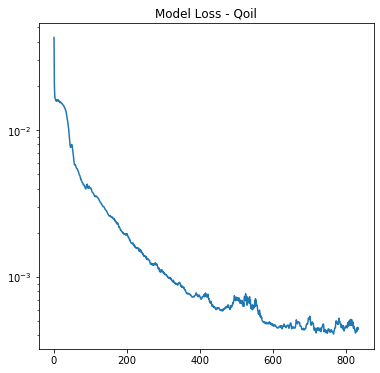

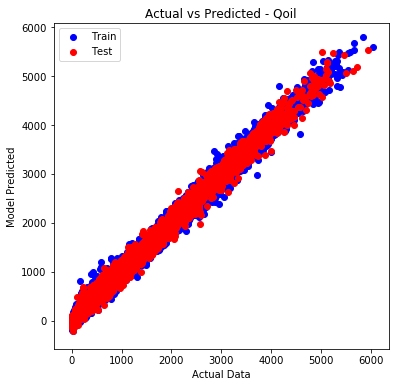

****************************************
Training: Qwater
****************************************


C:\Apps\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train R^2: 0.989660
Test  R^2: 0.989534
All   R^2: -2.357463
Train Data Model score: 0.989660
Test  Data Model score: 0.989534
All   Data Model score: -0.133453
Overall    Model loss : 0.000361
No. iterations reached: 640.000000
Model Solved in 38.87597465515137 secs


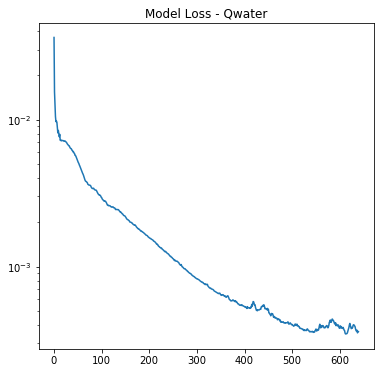

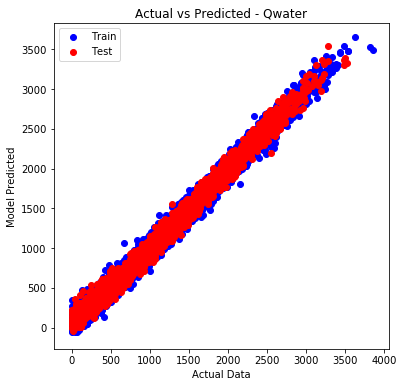

****************************************
Training: Qgas
****************************************


C:\Apps\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train R^2: 0.990036
Test  R^2: 0.990171
All   R^2: -0.499747
Train Data Model score: 0.990036
Test  Data Model score: 0.990171
All   Data Model score: -1273757.332088
Overall    Model loss : 0.000434
No. iterations reached: 665.000000
Model Solved in 40.258278131484985 secs


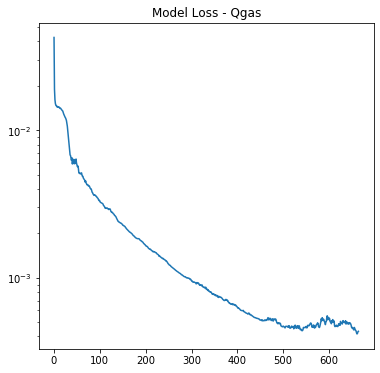

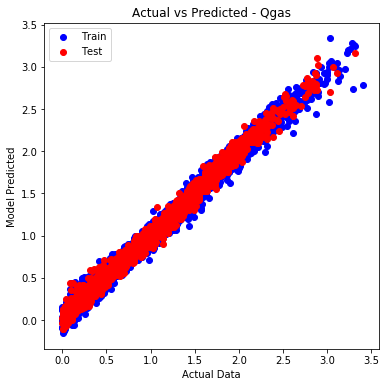

In [7]:
for VariableName in VariableNames:
    y = np.array(df[[VariableName]].values)
    y_pred = model(X, y, VariableName)